# **Exploring Time Spent in Prison for Inmates**

One topic that we were really fascinated in exploring was the criminal justice system and what factors could cause people to spend more time in prison compared to others. The dataset we chose to answer this question was a dataset that recorded information on offenders that were released from Iowa prisons. One key variable we were interested in was the months an inmate spent in prison before leaving. What attributes changed how long the inmates were kept in prison?

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from altair import *
import matplotlib.pyplot as plt
import pylab as pl

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("Copy of df.csv")

## **Age of Inmates**

In [0]:
df["time served"] = df["months_served"]**.5

Chart(df).mark_circle().encode(
    x="age_at_admission",
    y="time served",
)

alt.Chart(...)

To create this graph, a new variable was created (time served) so that the values would be more spread out. Therefore, we can see the individual differences clearer. From the graph, we can see that as the the age of admission into prison increases, inmates serve less time. This makes sense as the older inmates are, they are more likely to pass away naturally or from diseases/illness. 

In [0]:
Chart(df).mark_circle().encode(
    x="age_at_admission",
    y="time served",
    color="offense_type"
)

alt.Chart(...)

We then added the offense type of the crime the inmates committed. We can see that violent crimes led to much more time served, while inmates who committed less serious crimes served less time. However, we can still see the trend where younger inmates served more time compared to older inmates. For example, the younger inmates who committed violent crimes served much more time compared to older inmates who committed violent crimes.

## **Sex of Inmates**

Text(0.5, 0, 'Sex')

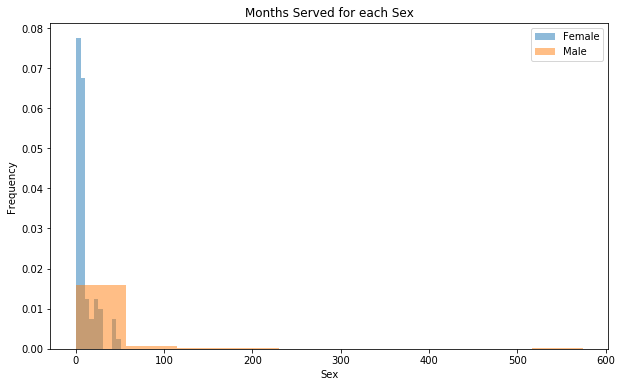

In [0]:
sex_months_served = df.groupby("sex")['months_served']
sex_months_served.plot.hist(
    figsize = (10, 6),
    density=True,
    alpha=0.5,
    legend=True
)

pl.title("Months Served for each Sex")
pl.xlabel("Sex")

Next, we looked at the difference in months served for men and women. It seems that from this histogram above, men are much more likely to serve longer in prison.

In [0]:
Chart(df).mark_circle().encode(
    x=X("age_at_admission", scale=Scale(domain=(0, 90))),
    y=Y("time served", axis=Axis(format="e")),
    color = "offense_type",
    column="sex"
)

alt.Chart(...)

We can see that the reason that men serve more time than woman from the plot above. Men commit much more violent crimes compared to women, and it makes sense that violent crimes would lead to longer prison time. However, what is interesting about our data is that the range in age for women seems to be between 40 and 70. As we see above, the older the inmate is generally the less time they spend in prison. Since we have a sizable amount of men that are younger, this would increase the time spent in prison for men. We can also see that for men range 40 to 70, they still generally have more time served compared to women. This makes sense as we can see that those that men who served more usually committed either violent or drug related crimes.

## **Offense Type of Inmates**

In [0]:
Chart(df).mark_bar().encode(
    x='offense_type',
    y='average(months_served)'
)

alt.Chart(...)

As expected, inmates who committed violet crimes had a much higher prison time compared to any other type of crime except "other" crimes. 

In [0]:
Chart(df).mark_bar().encode(
    x='offense_type:O',
    y='average(months_served):Q',
    color='sex:N',
    column='sex:N'
)

alt.Chart(...)

The plots above bring up a few interesting points about our previous plots. While it seemed that male inmates committed more violent crimes compared to female inmates, men who committed violent crimes recieve a significant increase in time spent in jail compared to women who also committed violent crimes. Furthermore, we can see that men who commit "other" crimes recieve much more prison time than women who committed "other crimes. In fact, men in "other" crimes recieved even more time in prison than men who committed violent crimes. This leads us to believe that men must commit much different "other" crimes than women, which would explain the drastic difference in time spent in prison. 

The difference in time spent in prison for violent men and women is harder to explain. Without any other additional information, we believe that this could be caused by how broad "violent" crimes are. Like the "other" crime category, violent crimes could encompass a large variety of crimes, and men and women could commit very different "violent" crimes that cause this drastic difference in time spent in prison.

## **Additional Analysis**

Text(0.5, 0, '')

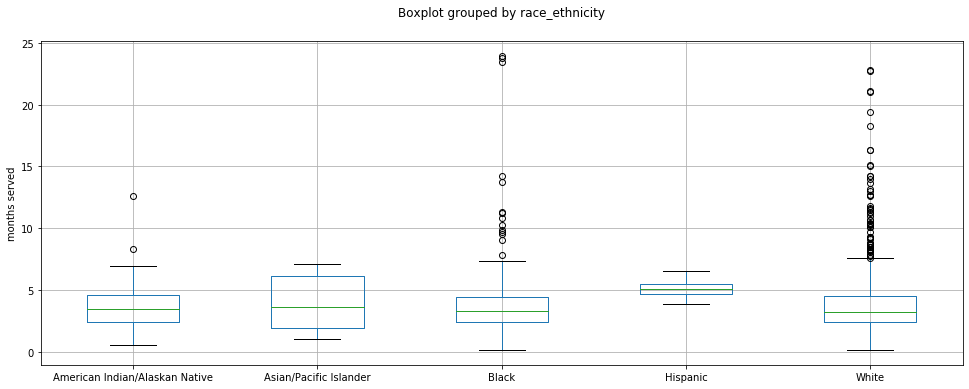

In [0]:
df.boxplot('time served', by="race_ethnicity")
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title("")
ax = plt.gca()
ax.set_ylabel("months served")
ax.set_xlabel("")

From the plot, we can see that the median time spent in prison seems to be reletively similar between all races. Hispanics have a slightly higher median time compared to the other races, but overall seems fairly similar. 

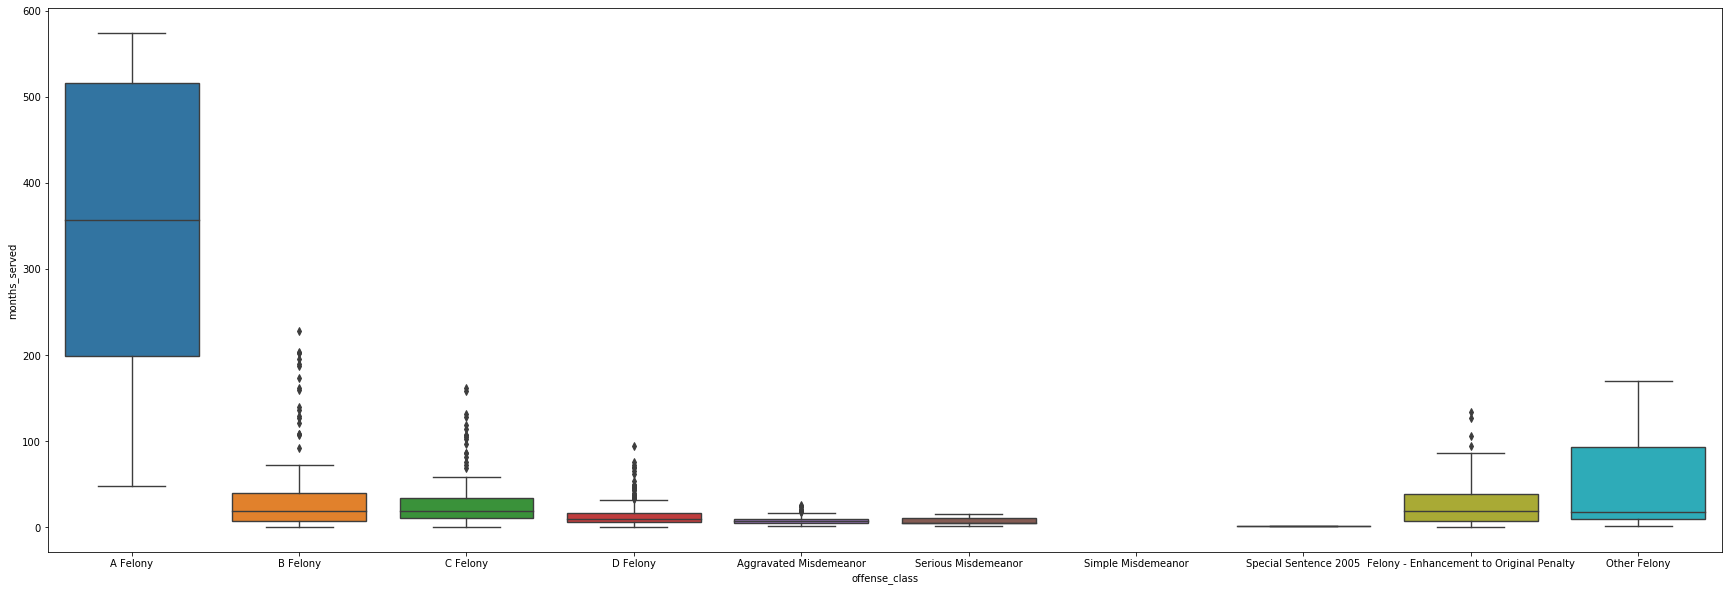

In [0]:
dims = (30, 10)
fig, ax = pyplot.subplots(figsize = dims)
sns.boxplot(ax=ax, x='offense_class', y='months_served', data=df, order=["A Felony", 
                                                                       "B Felony",
                                                                       "C Felony",
                                                                       "D Felony",
                                                                       "Aggravated Misdemeanor",
                                                                       "Serious Misdemeanor",
                                                                       "Simple Misdemeanor",
                                                                       "Special Sentence 2005",
                                                                       "Felony - Enhancement to Original Penalty",
                                                                       "Other Felony"], 
            width = 0.8, linewidth = 1.4) 

The plot above shows the first offense classes in order from most to least serious. For example, an A Felony would lead to a convicted maximum penality of life. B Felony is between 25-50 years, and so on until simple misdeameanor, which is 30 days. As expected, A Felony cases lead to much more time in prison spent, much more compared to any other offense class. However, what is surprising is that B, C, and D felonies have reletively similar median prison time spent. This is surprising given that B Felonies are given twice is long maximum penality sentences compared to C Felonies, and this pattern is seen as the offense classes become less serious.